# Régression logistique avec descente de gradient et calcul parallèle

In [54]:
library(readxl)
library(ggplot2)
library(devtools)

## Fonction sigmoide

$ \Large h(x) =  \frac{1}{1 + e^{-x} }  $  

![equation](https://latex.codecogs.com/png.latex?%5Clarge%20h%28x%29%20%3D%20%5Cfrac%7B1%7D%7B1%20&plus;%20e%5E%7B-x%7D%20%7D)

In [55]:
sigmoid <- function(x) {
    return(1 / (1 + exp(-x)))
}

## Modèle

$ \Large F(X) = X.\theta  $  
![equation](https://latex.codecogs.com/png.latex?%5Clarge%20F%28X%29%20%3D%20X.%5Ctheta)

In [56]:
x_dot_theta <- function(x, theta) {
    return(x %*% theta)
}

## Fonction de la régression logistique

$ \Large h_ \theta (x) =  \frac{1}{1 + e^{- X.\theta} }  $  
![equation](https://latex.codecogs.com/png.latex?%5Clarge%20h_%20%5Ctheta%20%28x%29%20%3D%20%5Cfrac%7B1%7D%7B1%20&plus;%20e%5E%7B-%20X.%5Ctheta%7D%20%7D)

In [57]:
probability <- function(x, theta) {
    return(sigmoid(x_dot_theta(x, theta)))
}

## Fonction de cout

$ \Large J(\theta) = -\frac{1}{m} \sum y \times log(\sigma(X.\theta)) + (1-y) \times (1-\sigma(X.\theta)) $  
![equation](https://latex.codecogs.com/png.latex?%5Clarge%20J%28%5Ctheta%29%20%3D%20-%5Cfrac%7B1%7D%7Bm%7D%20%5Csum%20y%20%5Ctimes%20log%28%5Csigma%28X.%5Ctheta%29%29%20&plus;%20%281-y%29%20%5Ctimes%20%281-%5Csigma%28X.%5Ctheta%29%29)

In [58]:
cost_function <- function(x, y, theta) {
    m <- nrow(y)
    g <- probability(x, theta)
    j <- (1 / m) * sum((-y * log(g)) - ((1 - y) * log(1 - g)))
    return(j)
}

## Calcul du gradient

$\Large \frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(\sigma(X.\theta)-y)$  
![equation](https://latex.codecogs.com/gif.latex?%5Cfrac%7B%5Cpartial%20J%28%5Ctheta%29%20%7D%7B%5Cpartial%20%5Ctheta%7D%20%3D%20%5Cfrac%7B1%7D%7Bm%7D%20X%5ET.%28%5Csigma%28X.%5Ctheta%29-y%29)



In [59]:
# Gradient : calcul des dérivées partielles de chacun des paramètres de theta
gradient <- function(x, y, theta) {
    m <- nrow(y)
    return((1 / m) * x_dot_theta(t(x), probability(x, theta) - y))
}

## Descente de gradient

$\Large \theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$  
![equation](https://latex.codecogs.com/png.latex?%5Clarge%20%5Ctheta%20%3D%20%5Ctheta%20-%20%5Calpha%20%5Cfrac%7B%5Cpartial%20J%28%5Ctheta%29%20%7D%7B%5Cpartial%20%5Ctheta%7D)




In [60]:
get_x_y <- function(formula, data) {
    data_frame <- model.frame(formula, data)

    #y <- as.factor(data_frame[, 1])
    #levels(y) <- c(1, 0)
    #y <- matrix(as.integer(y))

    y <- matrix(ifelse(data_frame[, 1]== "malignant",1,0))


    x <- data_frame[, -1]
    x <- as.matrix(data.frame(rep(1, length(y)), x))

    return(list(target = y, features = x))
}

In [61]:
# Gradient descent
fit <- function(formula, data, learning_rate, n_iter, mode) {

    xy <- get_x_y(formula, data)
    x <- xy$features
    y <- xy$target
 
    #Initialisation de theta
    theta <- as.matrix(rnorm(n = dim(x)[2], mean = 0, sd = 1))

    cost_history <- c(cost_function(x, y, theta))
    for (i in 1:n_iter) {
        # mise à jour des paramètres
        theta <- theta - learning_rate * gradient(x, y, theta)
        cost_history <- c(cost_history, cost_function(x, y, theta))
    }
    return(list(parameters = matrix(theta), cost_history = cost_history))
}

In [62]:
predict <- function(x, theta, thresold = 0.5) {
    predictions <- unlist(ifelse(probability(x, theta) > thresold, 1, 0))
    return(predictions)
}

In [63]:
# test avec data_breast_cancer
data <- read_excel("breast.xlsx")
data

clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10,6,6,2,4,10,9,7,1,malignant
4,2,2,1,2,1,2,1,1,begnin
1,1,1,1,2,1,2,1,1,begnin
2,1,1,1,2,1,2,1,1,begnin
4,1,1,1,2,1,2,1,1,begnin
1,1,1,1,2,1,1,1,1,begnin
1,1,1,1,2,1,2,1,1,begnin
5,1,1,1,2,1,2,1,1,begnin
3,1,1,1,2,1,2,1,1,begnin


In [64]:
# Entrainement
res <- fit(classe~clump, data, learning_rate = 0.1, n_iter = 10)

            [,1]
[1,]  0.37647500
[2,] -0.02616864
 [1] 2.5638813 2.0206884 1.5281427 1.1302248 0.8879824 0.8057055 0.7894962
 [8] 0.7832357 0.7779775 0.7728737 0.7678471


ERROR: Error in mean(y_pred == y): objet 'y_pred' introuvable


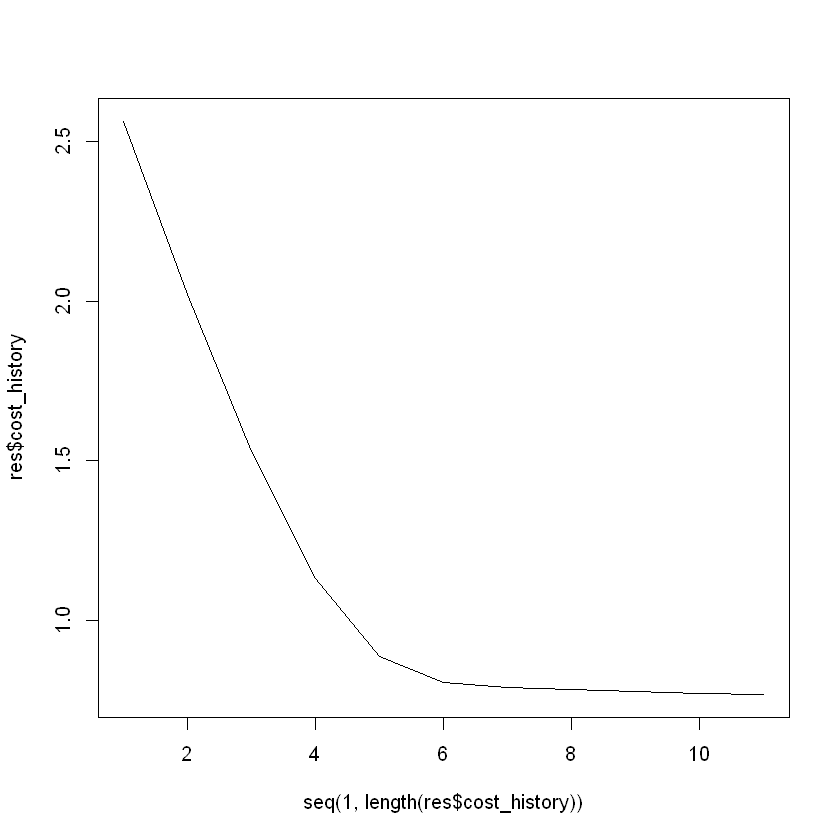

In [65]:
#y_pred <- predict(x, res$parameters)

print(res$parameters)
print(res$cost_history)
plot(seq(1, length(res$cost_history)), res$cost_history, type = "l")

accuracy <- mean(y_pred == y)
print(accuracy)

In [ ]:
theta <- as.matrix(rnorm(n = dim(x)[2], mean = 0, sd = 1))
print(x)

    clump ucellsize ucellshape mgadhesion sepics bnuclei bchromatin normnucl
1      10         6          6          2      4      10          9        7
2       4         2          2          1      2       1          2        1
3       1         1          1          1      2       1          2        1
4       2         1          1          1      2       1          2        1
5       4         1          1          1      2       1          2        1
6       1         1          1          1      2       1          1        1
7       1         1          1          1      2       1          2        1
8       5         1          1          1      2       1          2        1
9       3         1          1          1      2       1          2        1
10      1         1          1          1      2       4          2        1
11      5         3          3          2      3       1          3        1
12      4         2          2          1      2       1          2        1